<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"> 

# Capstone Project: Post-Covid Mental Health Status

## Problem Statement
The recent COVID pandemic has caused much distraught in every aspect of human society. The fear of an uncurable foreign illness, loss of jobs and mandatory isolation of the infected and predisposed populations have been overwhelming. In addition to the detrimental effects of COVID on the physical health of people, it has also brought to light the implications of such an unprecedented pandemic on the mental health of people.  Therefore, we aim to develop a model to predict susceptible populations to developing mental health problems and to curb the root of such issues before they manifest into a greater problem. We aim to provide well-informed suggestions to stateboards and mental health institutes on where to focus and channel resources. In addition, we strive to understand the underlying root causes of such mental distress through analyzing survey responses on different aspects of lifelihood, such as food security, employment status and many more.

## Executive Summary

## Contents

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import re

## Data Visualization

In [214]:
# Reading the csv file
df = pd.read_csv('../datasets/pulse2020_puf_13.csv')

In [63]:
# Number of columns and rows in data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 109051
Columns: 188


In [7]:
# Looking at the first 5 rows of data
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V130000001S12010403200123,13,48,19100.0,2,1276.886650,1278.107099,1989,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2
1,V130000001S34010154300113,13,1,NaN,2,1195.578846,2323.078960,1988,2,2,...,-99,-99,-99,1,1,-99,1,-99,1,6
2,V130000001S37010241600123,13,1,NaN,2,1124.648326,1092.628425,1969,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,7
3,V130000001S37010645600123,13,1,NaN,2,517.598058,1005.723011,1947,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,6
4,V130000001S70011963510113,13,1,NaN,2,432.646602,840.657411,1968,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [24]:
# Statistical summary of features
df.describe()

,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
count,109051.0,109051.000000,35244.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,...,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.000000,109051.00000,109051.000000,109051.000000,109051.000000
mean,13.0,27.699242,31792.698899,2.685239,1114.342647,2284.902624,1969.251974,1.991793,1.587753,1.993095,...,-84.786559,-89.458684,-88.606789,-81.777875,-88.182217,-87.666862,-86.22075,-86.225335,-88.262914,-16.580215
std,0.0,16.409699,11514.840187,1.079868,1755.280822,4156.272497,15.953085,0.090221,0.492242,0.082809,...,19.677547,5.565538,9.959077,24.361783,11.516732,13.143646,16.80769,16.797533,11.238543,39.391120
min,13.0,1.000000,12060.000000,1.000000,19.994057,19.635651,1932.000000,1.000000,1.000000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,-99.000000
25%,13.0,12.000000,19100.000000,2.000000,332.761427,555.814095,1956.000000,2.000000,1.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,1.000000
50%,13.0,27.000000,35620.000000,3.000000,604.820254,1125.616392,1969.000000,2.000000,2.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,4.000000
75%,13.0,42.000000,41860.000000,4.000000,1179.949186,2348.620985,1982.000000,2.000000,2.000000,2.000000,...,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.00000,-88.000000,-88.000000,6.000000
max,13.0,56.000000,47900.000000,4.000000,110618.302480,228944.991150,2002.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000


In [64]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA'], dtype='object')

In [65]:
# Displaying percentage of null values in EST_MSA columns
df[null_columns].isnull().sum()/len(df) * 100

EST_MSA    67.681177
dtype: float64

In [215]:
# Converting all missing values to np.nan
for col in df.columns:
    try:
        df[col] = df[col].map(lambda x: np.nan if x == -88 else x)
    except ValueError:
        print(f'{col} cannot be converted to null values')

In [86]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA', 'KINDWORK', 'RSNNOWRK', 'UNEMPPAY', 'UI_RECV', 'TUI_NUMPER',
       'SSA_RECV', 'SSA_APPLY', 'SSAPGM1', 'SSAPGM2',
       ...
       'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5',
       'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'INCOME'],
      dtype='object', length=159)

In [91]:
# Displaying percentage of null values in all columns with null values
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = sorted(percent_null.items(),key = lambda x: x[1],reverse = True)
sorted_percent_null

[('SNAPMNTH9', 100.0),
 ('SNAPMNTH10', 100.0),
 ('SNAPMNTH11', 100.0),
 ('SNAPMNTH12', 100.0),
 ('EVICT', 97.72400069692162),
 ('SSAPGM1', 97.71207966914562),
 ('SSAPGM2', 97.71207966914562),
 ('SSAPGM3', 97.71207966914562),
 ('SSAPGM4', 97.71207966914562),
 ('SSAPGM5', 97.71207966914562),
 ('FORCLOSE', 97.09585423334036),
 ('SSAEXPCT1', 94.96565826998376),
 ('SSAEXPCT2', 94.96565826998376),
 ('SSAEXPCT3', 94.96565826998376),
 ('SSAEXPCT4', 94.96565826998376),
 ('SSAEXPCT5', 94.96565826998376),
 ('WHEREFREE1', 94.74557775719617),
 ('WHEREFREE2', 94.74557775719617),
 ('WHEREFREE3', 94.74557775719617),
 ('WHEREFREE4', 94.74557775719617),
 ('WHEREFREE5', 94.74557775719617),
 ('WHEREFREE6', 94.74557775719617),
 ('WHEREFREE7', 94.74557775719617),
 ('SNAPMNTH1', 93.74421142401262),
 ('SNAPMNTH2', 93.74421142401262),
 ('SNAPMNTH3', 93.74421142401262),
 ('SNAPMNTH4', 93.74421142401262),
 ('SNAPMNTH5', 93.74421142401262),
 ('SNAPMNTH6', 93.74421142401262),
 ('SNAPMNTH7', 93.74421142401262),
 ('

**`SNAPMNTH`**

The high percentage of null values of > 90% in all `SNAPMNTH` columns(`SNAPMNTH1`-`SNAPMNTH12`) suggest a lack of awareness or exposure to the Supplemental Nutrition Assistance Program(SNAP) or Food Stamp Program

In [217]:
# Looking at the percentage of people who received the SNAP receipt
df['SNAP_YN'].value_counts(normalize = True, dropna = False) * 100

 2.0     83.787402
 NaN      8.918763
 1.0      6.308975
-99.0     0.984860
Name: SNAP_YN, dtype: float64

Based on the `SNAP_YN` column which indicates if households have benefitted from the SNAP program, 91% of the population responded that they **do not** have access to such an aid which answers for the high null values in the `SNAPMNTH` columns. Therefore the `SNAPMNTH` columns can be dropped since a large amount of data is mising and the `SNAP_YN` feature is sufficient as an input in our model.

**Dropping the SNAPMNTH columns**

In [239]:
# Saving al SNAPMNTH columns in snap_cols
snap_cols = ['SNAPMNTH1','SNAPMNTH2','SNAPMNTH3',
             'SNAPMNTH4','SNAPMNTH5','SNAPMNTH6',
            'SNAPMNTH7','SNAPMNTH8','SNAPMNTH9',
             'SNAPMNTH10','SNAPMNTH11','SNAPMNTH12']

In [240]:
# Dropping all SNAPMNTH columns
df.drop(columns = snap_cols,inplace = True)

In [203]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]

percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = sorted(percent_null.items(),key = lambda x: x[1],reverse = True)
sorted_percent_null

[('EVICT', 97.72400069692162),
 ('SSAPGM1', 97.71207966914562),
 ('SSAPGM2', 97.71207966914562),
 ('SSAPGM3', 97.71207966914562),
 ('SSAPGM4', 97.71207966914562),
 ('SSAPGM5', 97.71207966914562),
 ('FORCLOSE', 97.09585423334036),
 ('SSAEXPCT1', 94.96565826998376),
 ('SSAEXPCT2', 94.96565826998376),
 ('SSAEXPCT3', 94.96565826998376),
 ('SSAEXPCT4', 94.96565826998376),
 ('SSAEXPCT5', 94.96565826998376),
 ('WHEREFREE1', 94.74557775719617),
 ('WHEREFREE2', 94.74557775719617),
 ('WHEREFREE3', 94.74557775719617),
 ('WHEREFREE4', 94.74557775719617),
 ('WHEREFREE5', 94.74557775719617),
 ('WHEREFREE6', 94.74557775719617),
 ('WHEREFREE7', 94.74557775719617),
 ('CHILDFOOD', 87.80662258943065),
 ('PSWHYCHG1', 84.99692804284234),
 ('PSWHYCHG2', 84.99692804284234),
 ('PSWHYCHG3', 84.99692804284234),
 ('PSWHYCHG4', 84.99692804284234),
 ('PSWHYCHG5', 84.99692804284234),
 ('PSWHYCHG6', 84.99692804284234),
 ('PSWHYCHG7', 84.99692804284234),
 ('PSWHYCHG8', 84.99692804284234),
 ('PSWHYCHG9', 84.9969280428

**`EVICT`**

The next feature with many null values would be `EVICT` which asks how likely the household will have to be evicted in the next 2 months.

In [223]:
# Removal of missing values from EVICT
df['EVICT'].value_counts(normalize = True) * 100

 3.0     30.741338
 2.0     29.814666
 4.0     24.254633
 1.0     14.504432
-99.0     0.684932
Name: EVICT, dtype: float64

Graph shows the sentiments of the remaining respondents, where > 60% feel that they are susceptible to eviction

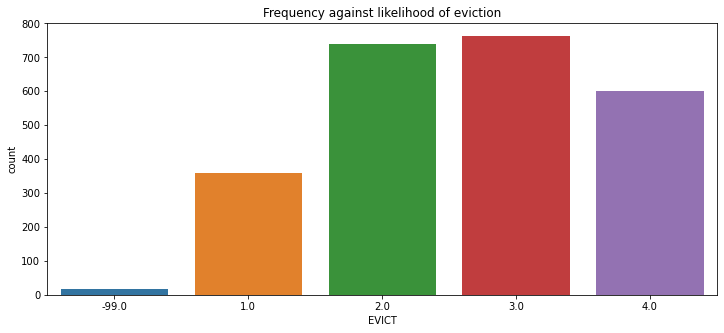

In [228]:
# 1 - Extremely likely to be evicted and 4 - Not at all likely
plt.figure(figsize = (12,5))
sns.countplot(df['EVICT'])
plt.title('Frequency against likelihood of eviction');

**`FORCLOSE`** <br>
Similar to `EVICT` which asks respondents about the likelihood of losing the ability to pay mortgage and thus obligated to give up their homes

In [248]:
df['FORCLOSE'].value_counts(normalize = True) * 100

 4.0     45.689927
 3.0     36.248816
 2.0     13.545943
 1.0      3.915377
-99.0     0.599937
Name: FORCLOSE, dtype: float64

For the remaining respondents, >50% are worried about foreclosure 

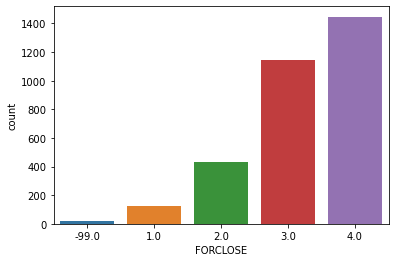

In [245]:
sns.countplot(df['FORCLOSE'])

**`SSAPGM`**

These questions are only asked if response to the application of Social Security Programs after March 13,2020/`SSA_APPLY` is 1(yes) 

In [230]:
df['SSA_APPLY'].value_counts(normalize = True,dropna = False)

 2.0     0.896746
 NaN     0.067033
 1.0     0.023127
-99.0    0.013095
Name: SSA_APPLY, dtype: float64

Therefore, since majority of the population has yet to apply for any Social Security Programs, the responses to the subsequent questions(`SSAPGM1` - `SSAPGM5`) are low and thus could be dropped

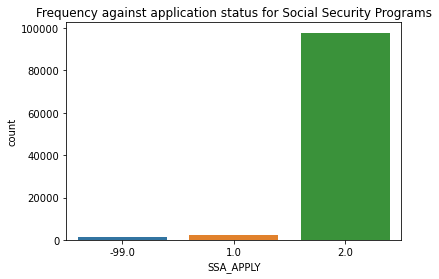

In [235]:
# 1 - Yes, 2 - No
sns.countplot(df['SSA_APPLY'])
plt.title('Frequency against application status for Social Security Programs');

In [249]:
ssapgm_cols = ['SSAPGM1','SSAPGM2','SSAPGM3','SSAPGM4','SSAPGM5']
df.drop(columns = ssapgm_cols,inplace = True)

KeyError: "['SSAPGM1' 'SSAPGM2' 'SSAPGM3' 'SSAPGM4' 'SSAPGM5'] not found in axis"

In [250]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]

percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = sorted(percent_null.items(),key = lambda x: x[1],reverse = True)
sorted_percent_null

[('EVICT', 97.72400069692162),
 ('FORCLOSE', 97.09585423334036),
 ('SSAEXPCT1', 94.96565826998376),
 ('SSAEXPCT2', 94.96565826998376),
 ('SSAEXPCT3', 94.96565826998376),
 ('SSAEXPCT4', 94.96565826998376),
 ('SSAEXPCT5', 94.96565826998376),
 ('WHEREFREE1', 94.74557775719617),
 ('WHEREFREE2', 94.74557775719617),
 ('WHEREFREE3', 94.74557775719617),
 ('WHEREFREE4', 94.74557775719617),
 ('WHEREFREE5', 94.74557775719617),
 ('WHEREFREE6', 94.74557775719617),
 ('WHEREFREE7', 94.74557775719617),
 ('CHILDFOOD', 87.80662258943065),
 ('PSWHYCHG1', 84.99692804284234),
 ('PSWHYCHG2', 84.99692804284234),
 ('PSWHYCHG3', 84.99692804284234),
 ('PSWHYCHG4', 84.99692804284234),
 ('PSWHYCHG5', 84.99692804284234),
 ('PSWHYCHG6', 84.99692804284234),
 ('PSWHYCHG7', 84.99692804284234),
 ('PSWHYCHG8', 84.99692804284234),
 ('PSWHYCHG9', 84.99692804284234),
 ('UI_RECV', 83.48387451742762),
 ('PSPLANS1', 80.4641864815545),
 ('PSPLANS2', 80.4641864815545),
 ('PSPLANS3', 80.4641864815545),
 ('PSPLANS4', 80.464186481

**`SSAEXPCT`**

These questions are asked only if response to the application of Social Security Programs in the next 12 months/`SSALIKELY` is likely(1-3). 

In [255]:
df['SSALIKELY'].value_counts(normalize = True,dropna = False)*100

 4.0     65.274046
 NaN     29.445856
 3.0      2.923403
 1.0      1.255376
 2.0      1.000449
-99.0     0.100870
Name: SSALIKELY, dtype: float64

A large percentage of people are unlikely to apply for the SSP even within the next 12 months. However, there is a large proportion of null values.

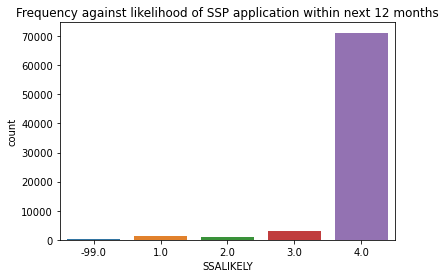

In [258]:
sns.countplot(df['SSALIKELY'])
plt.title('Frequency against likelihood of SSP application within next 12 months');

Since a large proportion of data is missing from the `SSAEXPCT` features and that these features are correlated, they would be dropped.

In [260]:
ssa_cols = ['SSAEXPCT1','SSAEXPCT2','SSAEXPCT3','SSAEXPCT4','SSAEXPCT5']
df.drop(columns = ssa_cols,inplace = True)

**`WHEREFREE`**

These questions are asked only if respondent's response to free groceries or a free meal in the last 7 days/`FREEFOOD` is yes(1)

In [264]:
df['FREEFOOD'].value_counts(normalize = True,dropna = False) * 100

 2.0     85.350891
 NaN      8.726192
 1.0      5.295687
-99.0     0.627229
Name: FREEFOOD, dtype: float64

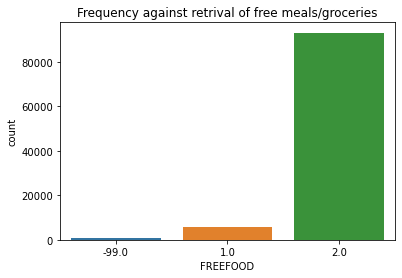

In [267]:
sns.countplot(df['FREEFOOD'])
plt.title('Frequency against retrival of free meals/groceries');

Since a large proportion of the population did not get free meals/groceries, the subsequent `WHEREFREE` questions would be expected to be left empty. Since these questions are also correlated, they should be dropped.

In [268]:
where_cols = ['WHEREFREE1','WHEREFREE2','WHEREFREE3',
             'WHEREFREE4','WHEREFREE5','WHEREFREE6','WHEREFREE7']
df.drop(columns = where_cols,inplace = True)

Dropping all `PSWHYCHG` because they are highly correlated to other features namely the `PSCHNG` features thus would all be dropped

In [270]:
# 7% of respondents did not seek help 
pswhy_psp_cols = ['PSWHYCHG1','PSWHYCHG2','PSWHYCHG3',
                 'PSWHYCHG4','PSWHYCHG5','PSWHYCHG6',
                  'PSWHYCHG7','PSWHYCHG8','PSWHYCHG9',
                  'PSPLANS1','PSPLANS2','PSPLANS3','PSPLANS4',
                  'PSPLANS5','PSPLANS6'
                 ]

In [ ]:
df.drop(columns = pswhy_psp_cols,inplace = True)

In [273]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]

percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = sorted(percent_null.items(),key = lambda x: x[1],reverse = True)
sorted_percent_null

[('EVICT', 97.72400069692162),
 ('FORCLOSE', 97.09585423334036),
 ('CHILDFOOD', 87.80662258943065),
 ('UI_RECV', 83.48387451742762),
 ('PSPLANS4', 80.4641864815545),
 ('PSCHNG1', 80.4641864815545),
 ('PSCHNG2', 80.4641864815545),
 ('PSCHNG3', 80.4641864815545),
 ('PSCHNG4', 80.4641864815545),
 ('PSCHNG5', 80.4641864815545),
 ('PSCHNG6', 80.4641864815545),
 ('PSCHNG7', 80.4641864815545),
 ('RENTCUR', 80.02035744743286),
 ('INTRNT1', 79.30326177659994),
 ('INTRNT2', 79.30326177659994),
 ('INTRNT3', 79.30326177659994),
 ('SCHLHRS', 79.09051728090526),
 ('TSTDY_HRS', 79.09051728090526),
 ('TCH_HRS', 79.09051728090526),
 ('COMP1', 78.7869895736857),
 ('COMP2', 78.7869895736857),
 ('COMP3', 78.7869895736857),
 ('INTRNTAVAIL', 78.4935488899689),
 ('TEACH1', 78.31198246691915),
 ('TEACH2', 78.31198246691915),
 ('TEACH3', 78.31198246691915),
 ('TEACH4', 78.31198246691915),
 ('TEACH5', 78.31198246691915),
 ('COMPAVAIL', 78.31198246691915),
 ('FOODSUFRSN1', 70.21760460701873),
 ('FOODSUFRSN2', 70

In [274]:
df.shape

(109051, 143)